#IMPORTS AND READING CSV FILE

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "https://raw.githubusercontent.com/SushiApril/Techtern-insight/rebuild-site-with-flask/jobs.csv"
df = pd.read_csv(url)
df.head()

,name-of-company,name-of-job,location,salary,date,application-link
0,Matco,C#.NET Software Developer Intern (Summer 2024),Stow OH,$60K - $95K (Glassdoor est.),0,https://www.glassdoor.com/partner/jobListing.h...
1,"Cgi Group, Inc.",Software Developer Intern -- Entry Level,Phoenix AZ,$18.00 - $23.00 Per Hour (Employer est.),1,https://www.glassdoor.com/partner/jobListing.h...
2,Schneider Electric,Software Engineer Intern (Summer 2024),Atlanta GA,$75K - $116K (Glassdoor est.),1,https://www.glassdoor.com/partner/jobListing.h...
3,Onestaffmedical,Software Developer Backend Internship | Onsite...,Omaha NE,$17.00 - $25.00 Per Hour (Employer est.),2,https://www.glassdoor.com/partner/jobListing.h...
4,Emc Insurance,Intern-Software Engineering,Remote,NaN,2,https://www.glassdoor.com/partner/jobListing.h...


# DATA CLEANING

In [9]:
# 1. seperate city and state (for geospatial visualizations):
df[['city', 'state']] = df['location'].str.extract(r'(?P<city>.*(?=\s[A-Z]{2}$)) (?P<state>[A-Z]{2}$)')
df.head()

,name-of-company,name-of-job,location,salary,date,application-link,city,state
0,Matco,C#.NET Software Developer Intern (Summer 2024),Stow OH,$60K - $95K (Glassdoor est.),0,https://www.glassdoor.com/partner/jobListing.h...,Stow,OH
1,"Cgi Group, Inc.",Software Developer Intern -- Entry Level,Phoenix AZ,$18.00 - $23.00 Per Hour (Employer est.),1,https://www.glassdoor.com/partner/jobListing.h...,Phoenix,AZ
2,Schneider Electric,Software Engineer Intern (Summer 2024),Atlanta GA,$75K - $116K (Glassdoor est.),1,https://www.glassdoor.com/partner/jobListing.h...,Atlanta,GA
3,Onestaffmedical,Software Developer Backend Internship | Onsite...,Omaha NE,$17.00 - $25.00 Per Hour (Employer est.),2,https://www.glassdoor.com/partner/jobListing.h...,Omaha,NE
4,Emc Insurance,Intern-Software Engineering,Remote,NaN,2,https://www.glassdoor.com/partner/jobListing.h...,NaN,NaN


In [33]:
#2. min, max, avg for salary.
  # converting hourly rate to yearly
def extract_min_max(salary):

    if pd.isna(salary) or salary is None:
        return None, None
    clean_salary = salary.replace('$', '').replace(',', '').split(' (')[0].replace('\xa0', ' ')
    try:
      if 'Per Hour' in clean_salary:
          min_val, max_val = [float(val) for val in clean_salary.split(' Per Hour')[0].split(' - ')]
          # convert hourly to yearly (using 40 hours/week and 50 weeks/year)
          min_val, max_val = [val * 40 * 50 for val in (min_val, max_val)]
      elif 'K' in clean_salary:
          min_val, max_val = [float(val.split(' ')[0].replace('K', '')) * 1000 for val in clean_salary.split(' - ')]
    except:
      return None, None
    return min_val, max_val

min_lambda = lambda x: extract_min_max(x)[0] if not pd.isna(x) and extract_min_max(x)[0] is not None else None
max_lambda = lambda x: extract_min_max(x)[1] if not pd.isna(x) and extract_min_max(x)[1] is not None else None

df['min_salary'] = df['salary'].apply(min_lambda)
df['max_salary'] = df['salary'].apply(max_lambda)
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

df.head()

,name-of-company,name-of-job,location,salary,date,application-link,city,state,min_salary,max_salary,avg_salary
0,Matco,C#.NET Software Developer Intern (Summer 2024),Stow OH,$60K - $95K (Glassdoor est.),0,https://www.glassdoor.com/partner/jobListing.h...,Stow,OH,60000.0,95000.0,77500.0
1,"Cgi Group, Inc.",Software Developer Intern -- Entry Level,Phoenix AZ,$18.00 - $23.00 Per Hour (Employer est.),1,https://www.glassdoor.com/partner/jobListing.h...,Phoenix,AZ,36000.0,46000.0,41000.0
2,Schneider Electric,Software Engineer Intern (Summer 2024),Atlanta GA,$75K - $116K (Glassdoor est.),1,https://www.glassdoor.com/partner/jobListing.h...,Atlanta,GA,75000.0,116000.0,95500.0
3,Onestaffmedical,Software Developer Backend Internship | Onsite...,Omaha NE,$17.00 - $25.00 Per Hour (Employer est.),2,https://www.glassdoor.com/partner/jobListing.h...,Omaha,NE,34000.0,50000.0,42000.0
4,Emc Insurance,Intern-Software Engineering,Remote,NaN,2,https://www.glassdoor.com/partner/jobListing.h...,NaN,NaN,NaN,NaN,NaN


#DATA INSIGHTS

In [37]:
# statistical discreption of the dataset:
df.describe()

,date,min_salary,max_salary,avg_salary
count,381.000000,301.000000,301.000000,301.000000
mean,18.440945,64966.046512,95715.681063,80340.863787
std,10.557352,21310.529776,30741.744625,25581.143145
min,0.000000,5000.000000,10000.000000,7500.000000
25%,9.000000,54000.000000,78000.000000,65500.000000
50%,18.000000,64000.000000,95000.000000,80000.000000
75%,31.000000,74000.000000,111000.000000,92500.000000
max,31.000000,224000.000000,250000.000000,237000.000000


In [77]:
pivot_table = df.pivot_table(index='name-of-company', values='avg_salary', aggfunc='mean')

pivot_table_sorted = pivot_table.sort_values('avg_salary', ascending=False)

print(pivot_table_sorted)

                             avg_salary
name-of-company                        
Citadel Enterprise Americas    237000.0
Nvidia                         157500.0
Sap                            149500.0
Ambarella                      141750.0
The Trade Desk                 139000.0
...                                 ...
Herman Miller, Inc.             37150.0
Millerknoll                     37150.0
Belcan                          36000.0
Cencora                         34000.0
Microsoft                        7500.0

[235 rows x 1 columns]


In [78]:
pivot_table_median = df.pivot_table(index='state', values='avg_salary', aggfunc='median')

pivot_table_median_sorted = pivot_table_median.sort_values('avg_salary', ascending=False)

print(pivot_table_median_sorted)

       avg_salary
state            
AZ       100250.0
MA        99500.0
DC        96500.0
MO        91000.0
CA        90000.0
OR        88000.0
WA        88000.0
NC        86750.0
ND        86000.0
NV        85000.0
IL        85000.0
NJ        85000.0
MD        83500.0
ME        83500.0
ID        83000.0
TX        82250.0
MI        78500.0
PA        78000.0
IN        77500.0
AR        77000.0
MN        77000.0
WI        77000.0
NH        76500.0
RI        76000.0
OH        75500.0
FL        75500.0
KS        74500.0
SD        73500.0
VA        73500.0
CT        72750.0
GA        71500.0
IA        69500.0
NY        69000.0
OK        61750.0
UT        60000.0
CO        50200.0
NE        46000.0
TN        45000.0


#DATA VISUALIZATION

Text(0, 0.5, 'Count')

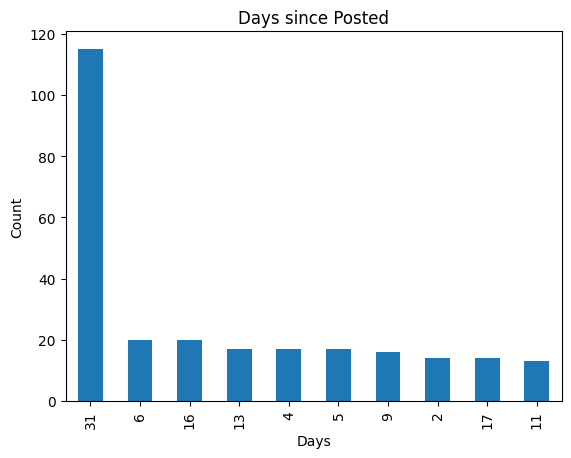

In [52]:
ax = df['date'].value_counts().head(10).plot(kind='bar', title='Days since Posted')
ax.set_xlabel('Days')
ax.set_ylabel('Count')

Text(0.5, 0, 'Pay ($)')

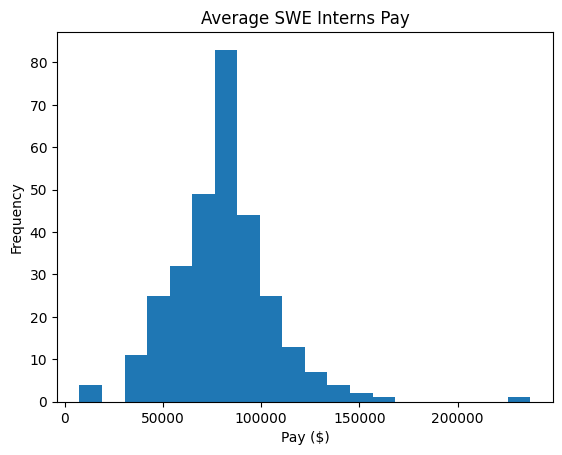

In [57]:
ax = df['avg_salary'].plot(kind='hist', bins= 20, title="Average SWE Interns Pay")
ax.set_xlabel('Pay ($)')


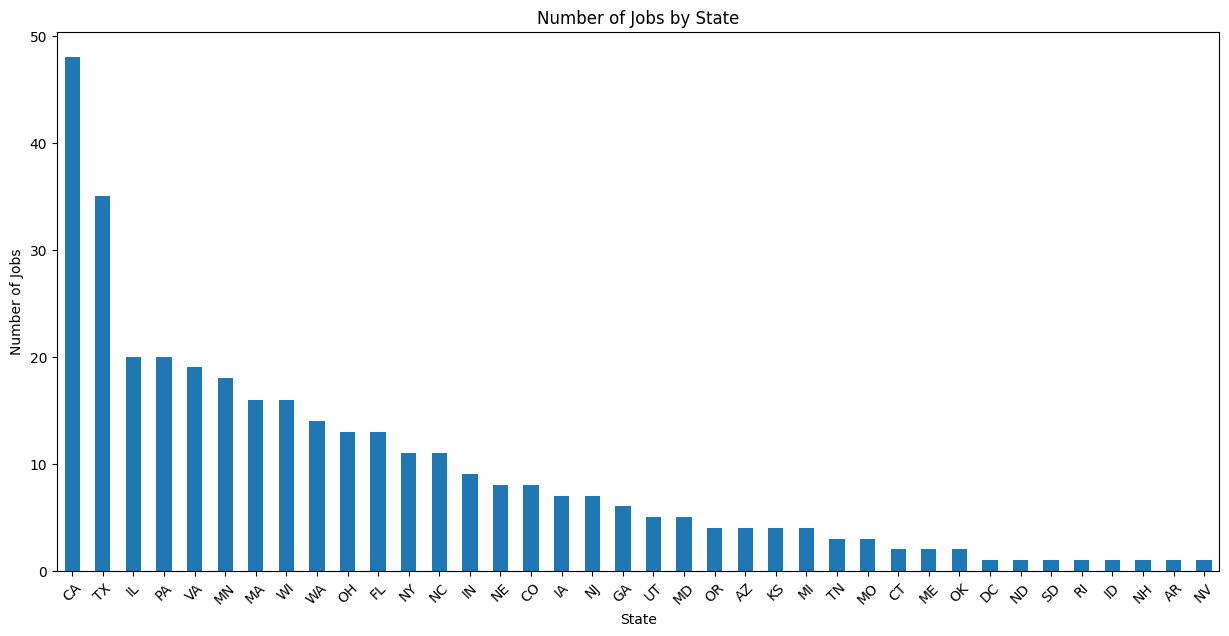

In [59]:
# Group by state and count the number of jobs
state_counts = df['state'].value_counts()

# Plot the results
state_counts.plot(kind='bar', figsize=(15,7))
plt.title('Number of Jobs by State')
plt.xlabel('State')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

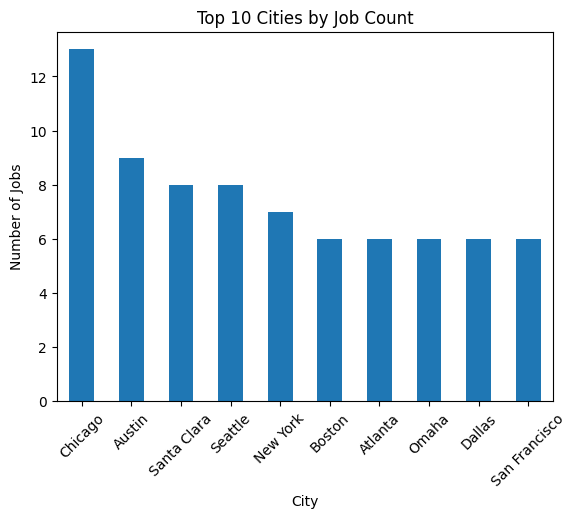

In [66]:
# Group by city and count the number of jobs
city_counts = df['city'].value_counts()
top_10_citites = city_counts.head(10)
# Plot the results
top_10_citites.plot(kind='bar')
plt.title('Top 10 Cities by Job Count')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

<Axes: >

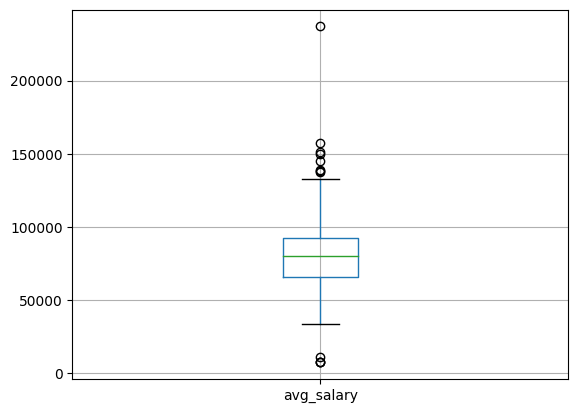

In [72]:
df.boxplot(column = ['avg_salary'])

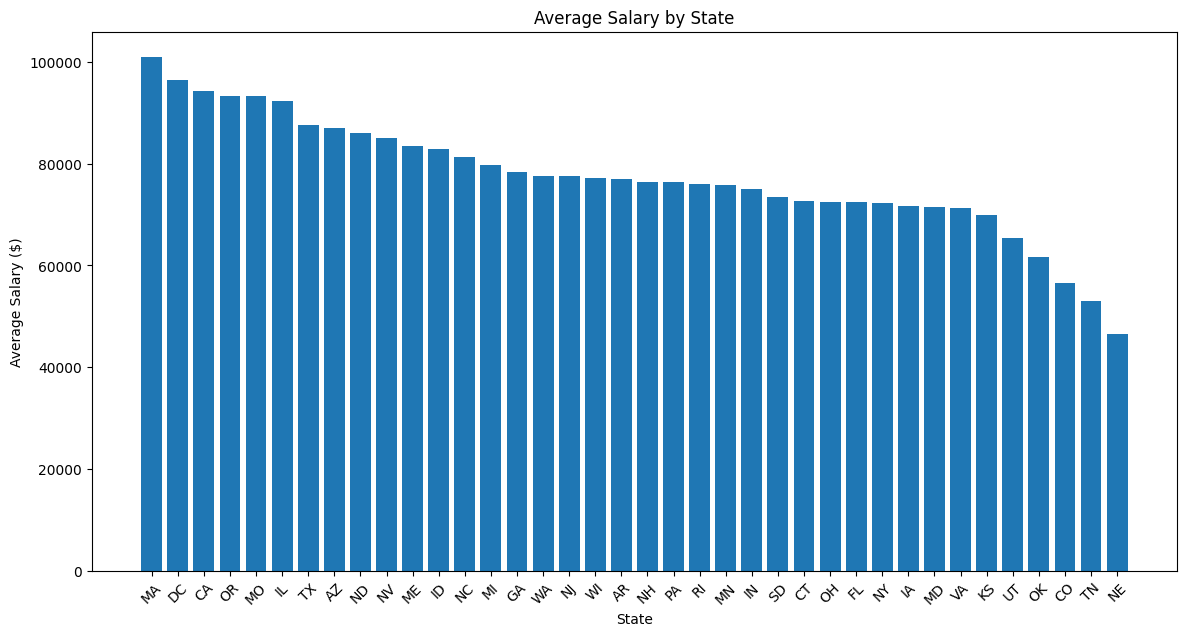

In [73]:
average_salary_by_state = df.groupby('state')['avg_salary'].mean().reset_index()
average_salary_by_state = average_salary_by_state.sort_values(by='avg_salary', ascending=False)
plt.figure(figsize=(14,7))
plt.bar(average_salary_by_state['state'], average_salary_by_state['avg_salary'])
plt.xlabel('State')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by State')
plt.xticks(rotation=45)
plt.show()

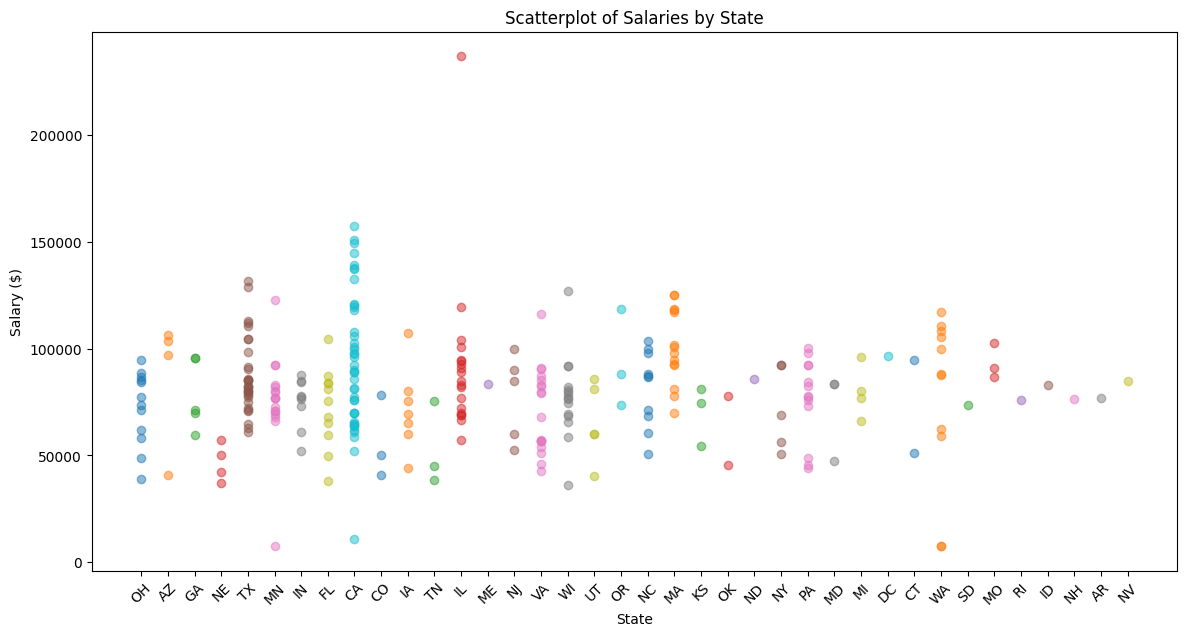

In [75]:
plt.figure(figsize=(14,7))

# For each unique state, plot the salary values
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.scatter([state] * len(state_data), state_data['avg_salary'], label=state, alpha=0.5)

plt.xlabel('State')
plt.ylabel('Salary ($)')
plt.title('Scatterplot of Salaries by State')
plt.xticks(rotation=45)
plt.show()

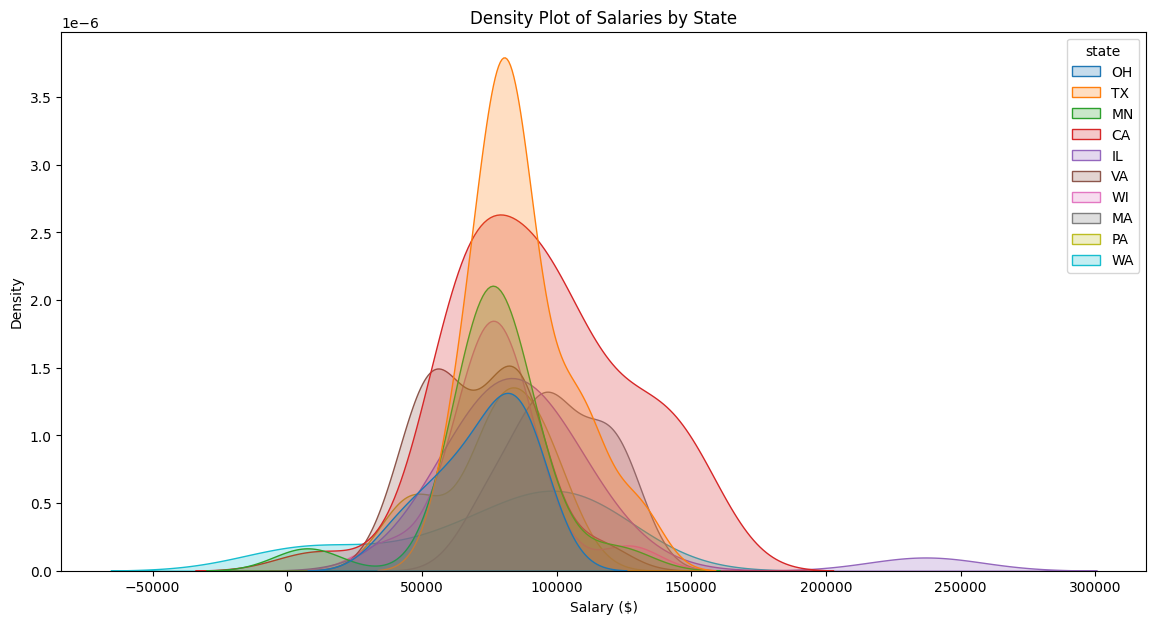

In [76]:
plt.figure(figsize=(14,7))

top_states = df['state'].value_counts().index[:10]
subset = df[df['state'].isin(top_states)]

sns.kdeplot(data=subset, x='avg_salary', hue='state', fill=True)

plt.title('Density Plot of Salaries by State')
plt.xlabel('Salary ($)')
plt.ylabel('Density')
plt.show()